## DRY Code: Don't repeat yoursel
An important concept in programming is DRY, which stands for don't repeat yourself. This is sometimes called refactoring as well. It is good practice to reduce the code lines where possible to reduce complexity and make it easier to change code later. In Python, this is often done via creating functions for repeated work.


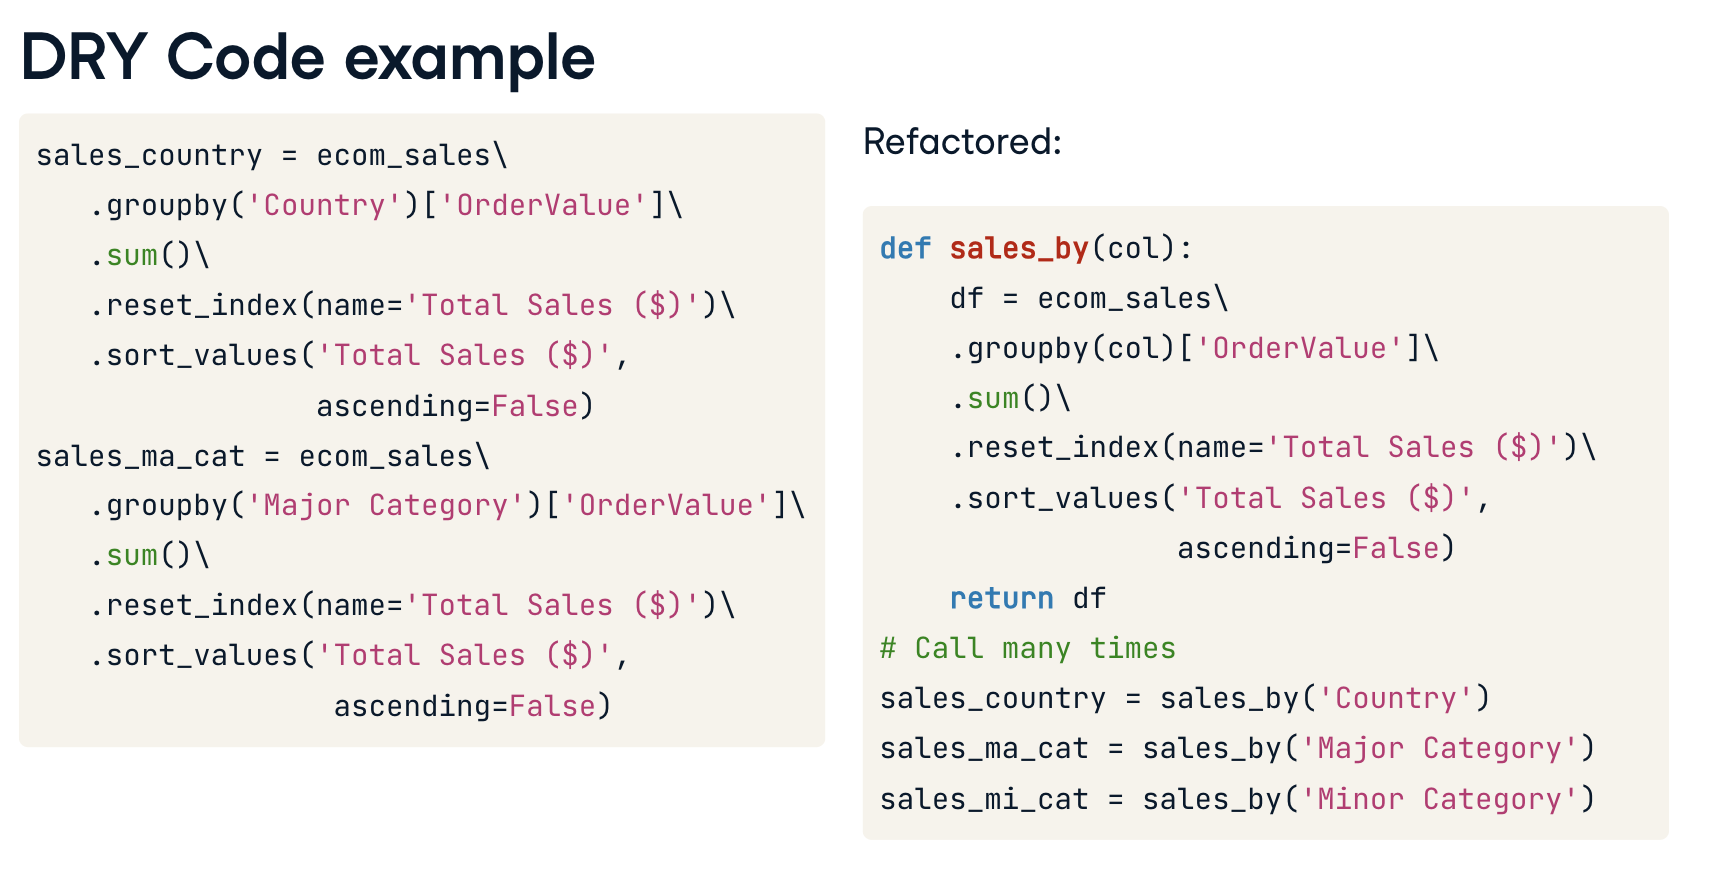

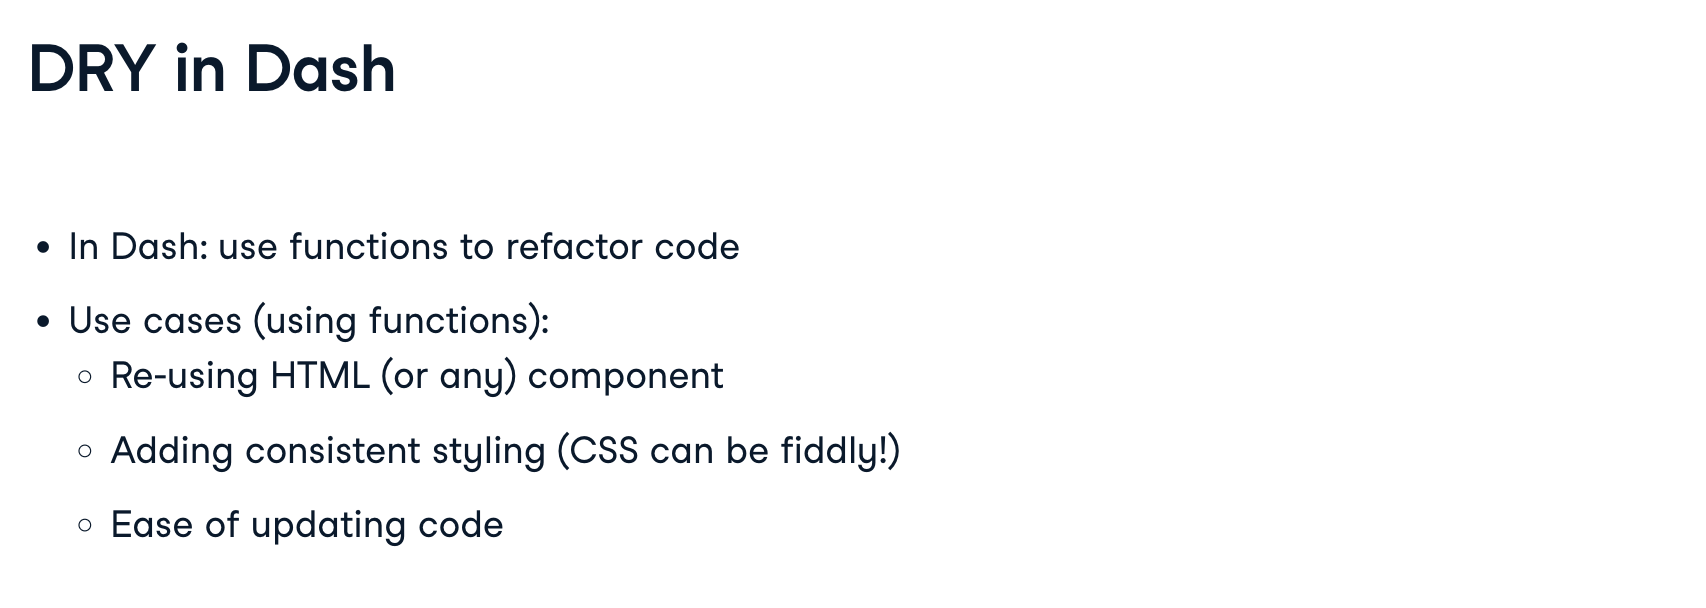

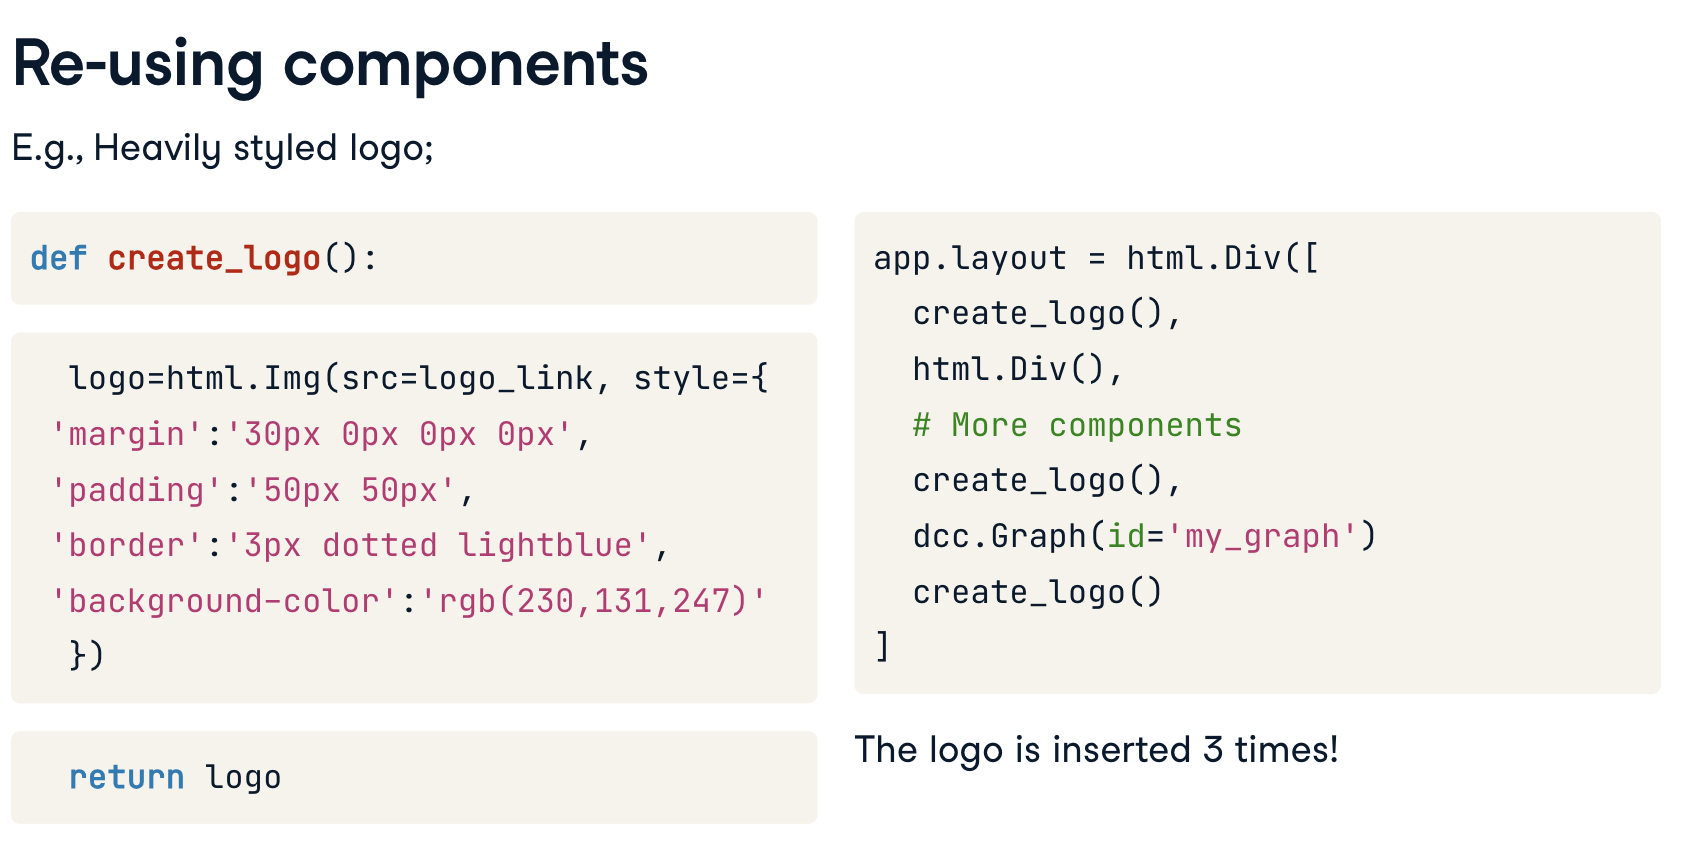

Instead of writing the css-style for logo 3 times, we put in function

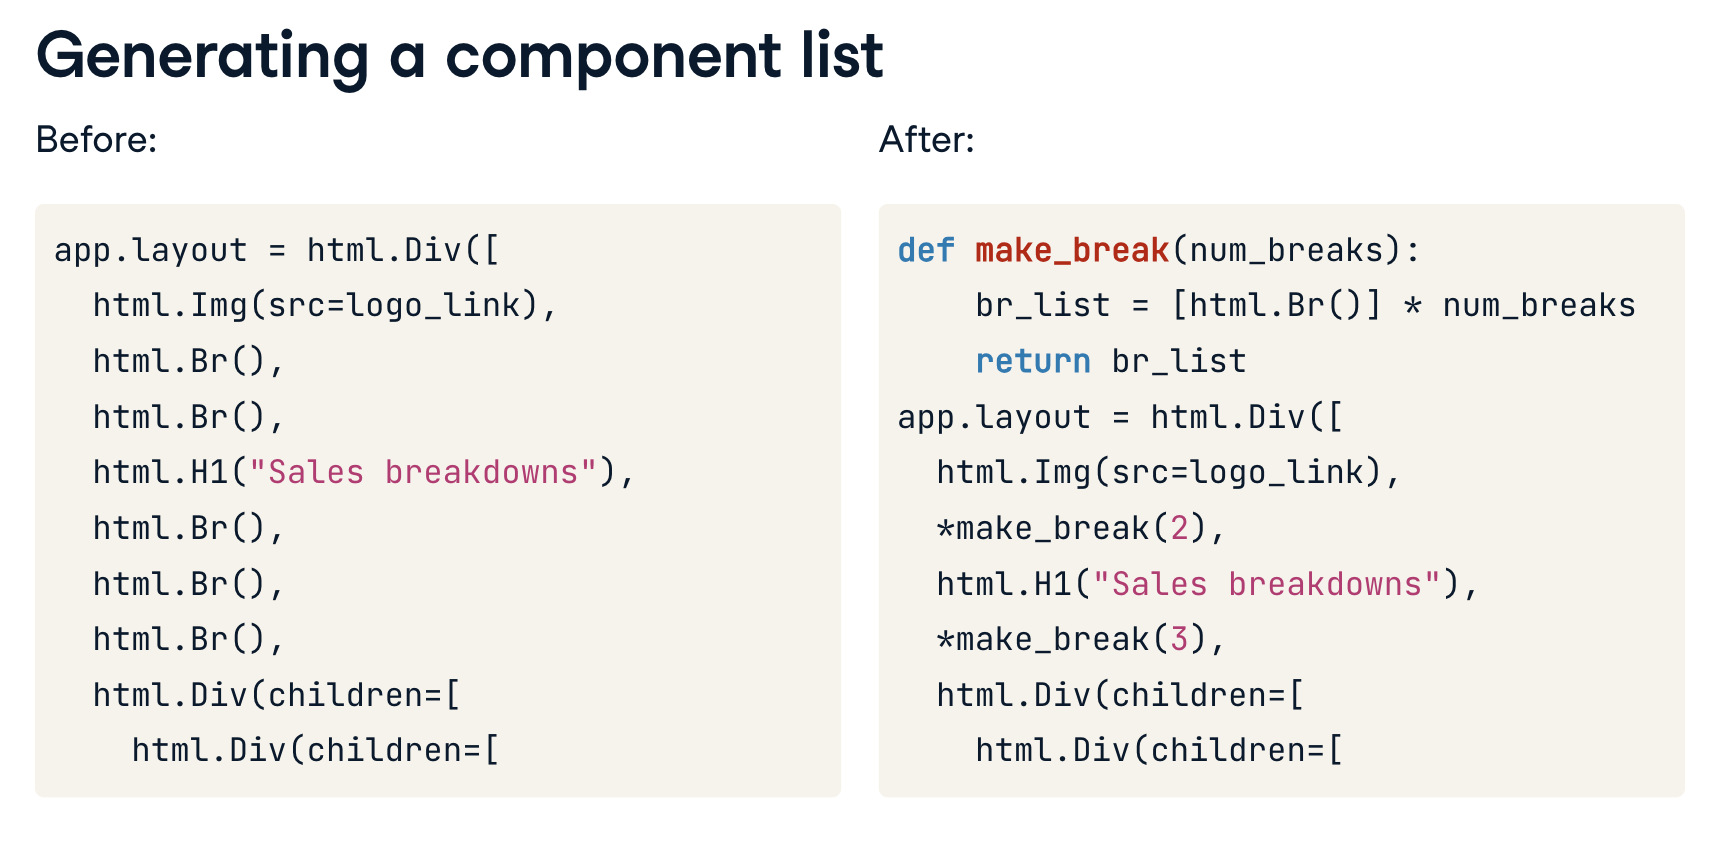

Write a function to make breaks

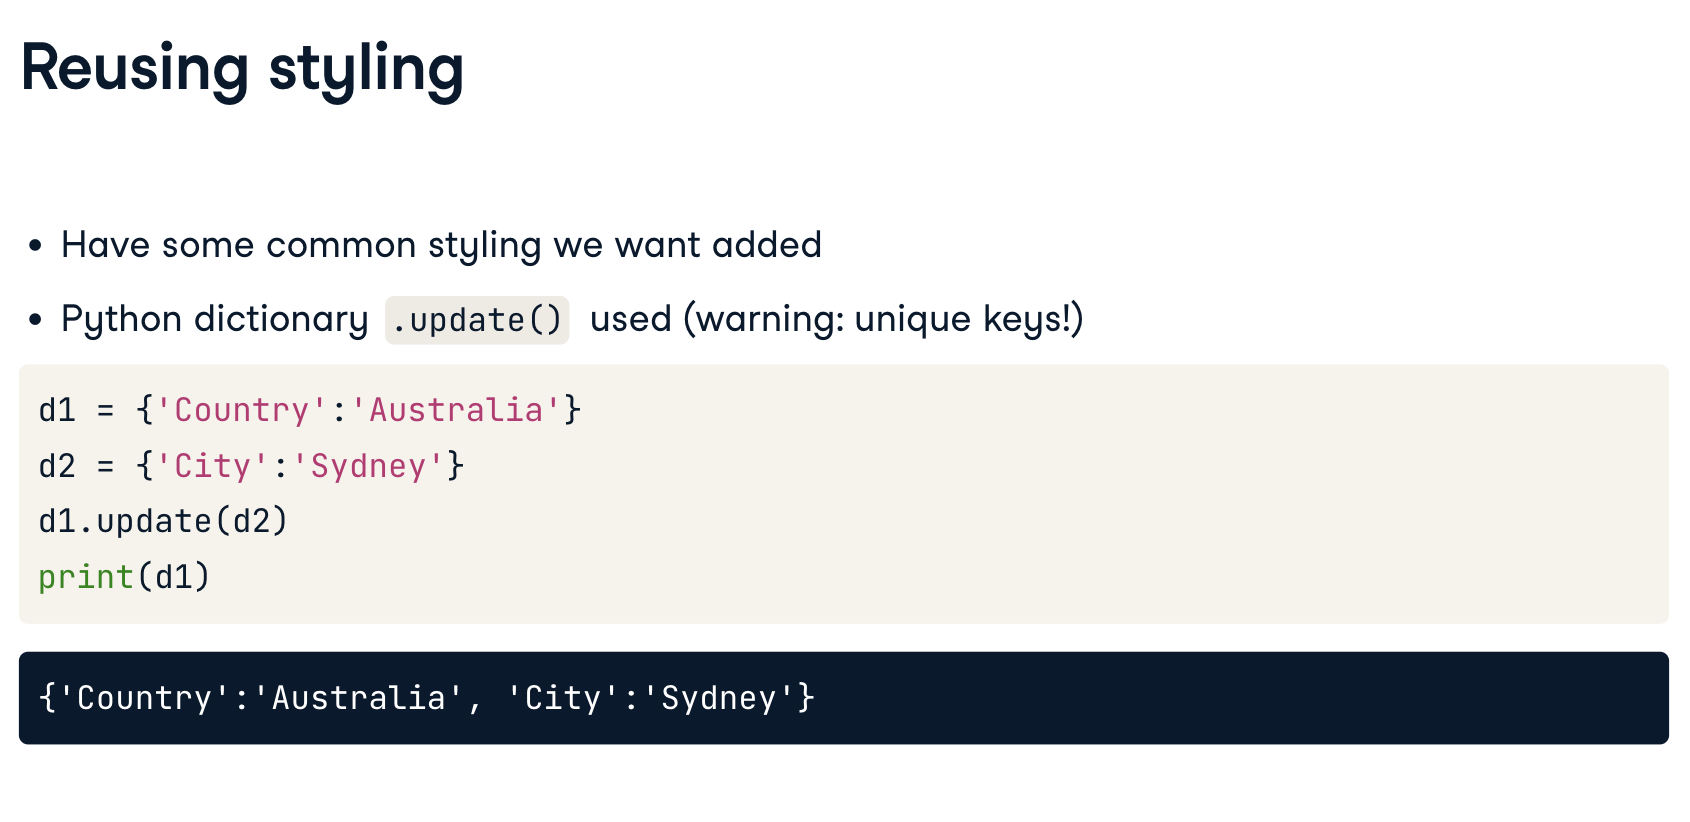

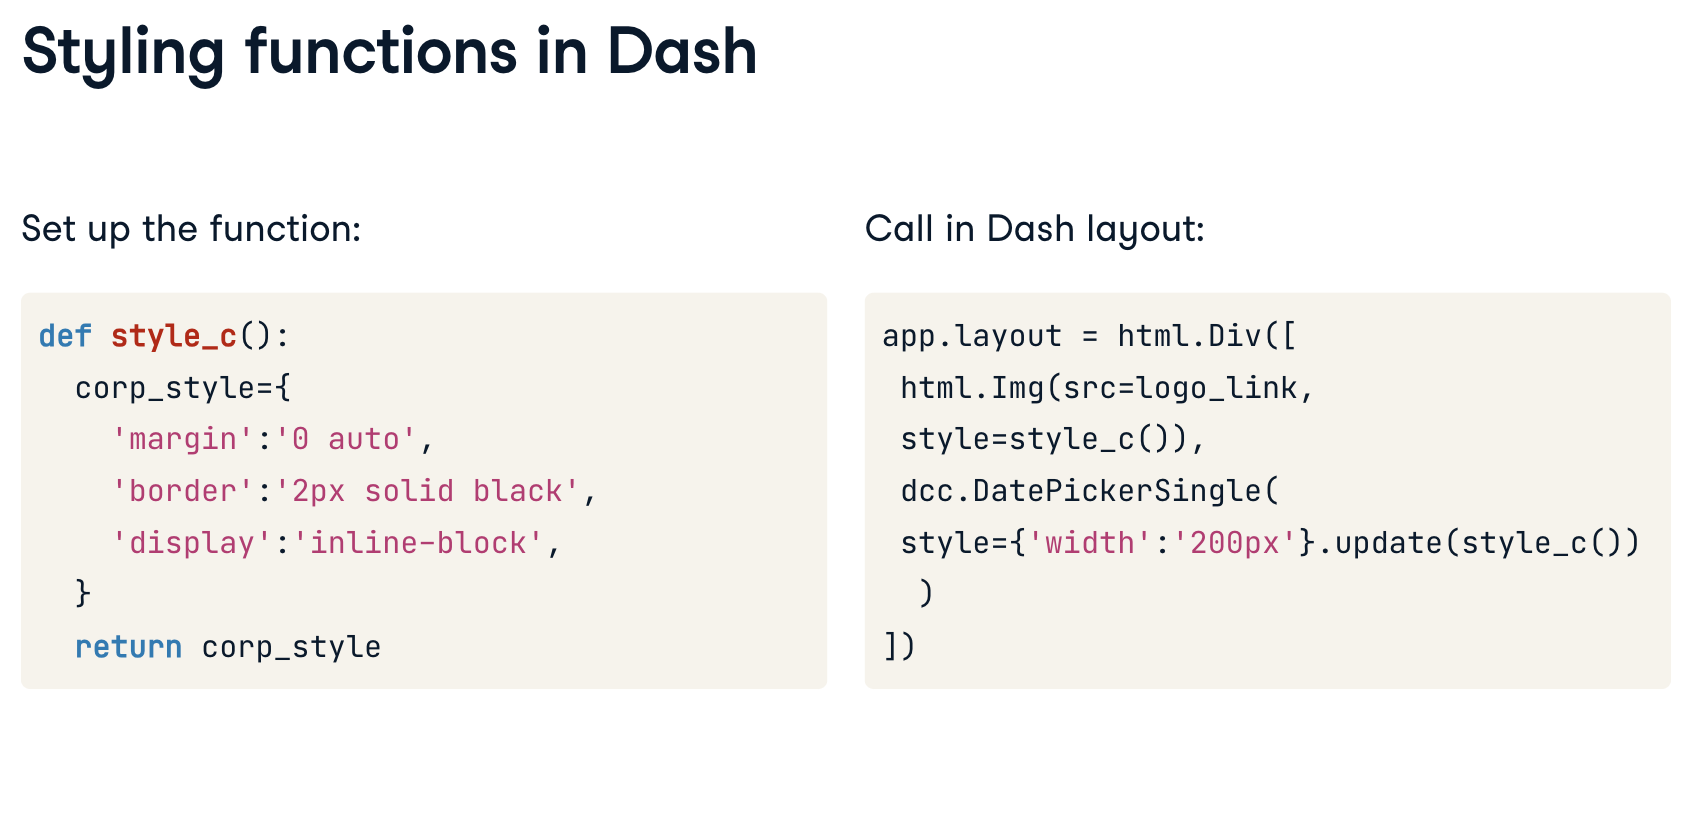

## Exercice
Your dashboards are starting to get quite lengthy in terms of the number of lines of code. The good news is, they are getting more attention around the organization. One of the senior managers saw your recent date picker sales dashboard and loved it! However, they had a few notes.

They want the logo to comply with corporate styling and align with the external website. The CSS for this is given below. They also want to include this logo in a few more places; on either side of the control panel and down at the bottom.

To ensure your code doesn't get unmanageable, you think this would be a great opportunity to take advantage of a Python function to create a reusable component.

The corporate logo style is: 'margin':'20px 20px 5px 5px', 'border':'1px dashed lightblue', 'display':'inline-block'

In [4]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output
from datetime import datetime, date

# Sample data
data = {
    'InvoiceDate': ['2023-09-01', '2023-09-01', '2023-09-02', '2023-09-02', '2023-09-03'],
    'Major Category': ['Clothes', 'Kitchen', 'Garden', 'Household', 'Clothes'],
    'Minor Category': ['Shirts', 'Cookware', 'Tools', 'Cleaning', 'Dresses'],
    'OrderValue': [15000, 18000, 22000, 20000, 24000],
}
# Create a DataFrame
ecom_sales = pd.DataFrame(data)
logo_link = 'logo.png'
ecom_sales['InvoiceDate'] = pd.to_datetime(ecom_sales['InvoiceDate'])

app = dash.Dash(__name__)

# Create a reusable component function called add_logo
def add_logo():
    # Add a component that will render an image
    corp_logo = html.Img(
        src=logo_link, 
        # Add the corporate styling
        style={'margin':'20px 20px 5px 5px', 'border':'1px dashed lightblue', 'display':'inline-block'})
    
    return corp_logo

app.layout = html.Div([
  # Insert the logo (1)
  add_logo(),
  html.Br(),
  html.H1('Sales breakdowns'),
  html.Br(),
  html.Br(),
  html.Div(
    children=[
    html.Div(
        children=[
        # Insert the logo (2)
        add_logo(),
        html.H2('Controls', style={'margin':'0 10px','display':'inline-block'}),
        # Insert the logo (3)
        add_logo(),
        html.H3('Sale Date Select'),
        html.Br(),
        dcc.DatePickerSingle(
            id='sale_date',
            min_date_allowed=ecom_sales.InvoiceDate.min(),
            max_date_allowed=ecom_sales.InvoiceDate.max(),
            initial_visible_month=date(2023,8,1),
            date=date(2023,8,11),
            style={'width':'200px', 'margin':'0 auto'}),
        ],
        style={'width':'550px', 'height':'350px', 'display':'inline-block', 'vertical-align':'top', 'border':'1px solid black', 'padding':'20px'}),
    html.Div(children=[
            dcc.Graph(id='sales_cat'),
            html.H2('Daily Sales by Major Category', 
            style={ 'border':'2px solid black', 'width':'400px', 'margin':'0 auto'})
            ],
             style={'width':'700px','display':'inline-block'}
             ),
    ]),
  	# Insert the logo (4)
    add_logo(),
    ], 
  style={'text-align':'center', 'display':'inline-block', 'width':'100%'}
  )

@app.callback(
    Output(component_id='sales_cat', component_property='figure'),
    Input(component_id='sale_date', component_property='date')
)
def update_plot(input_date):
    
    sales = ecom_sales.copy(deep=True)

    if input_date:
        sales = sales[sales['InvoiceDate'] == input_date]

    ecom_bar_major_cat = sales.groupby('Major Category')['OrderValue'].agg('sum').reset_index(name='Total Sales ($)')

    bar_fig_major_cat = px.bar(
        title=f'Sales on: {input_date}',data_frame=ecom_bar_major_cat, orientation='h', 
        x='Total Sales ($)', y='Major Category')

    return bar_fig_major_cat


if __name__ == '__main__':
    app.run_server(port=60306, debug=True)

In [9]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output
from datetime import datetime, date

logo_link = 'logo.png'
ecom_sales['InvoiceDate'] = pd.to_datetime(ecom_sales['InvoiceDate'])

app = dash.Dash(__name__)

def make_break(num_breaks):
    br_list = [html.Br()] * num_breaks
    return br_list

def add_logo():
    corp_logo = html.Img(
        src=logo_link, 
        style={'margin':'20px 20px 5px 5px',
              'border':'1px dashed lightblue',
              'display':'inline-block'})
    return corp_logo

# Create a function to add corporate styling
def style_c():
    layout_style={'display':'inline-block','margin':'0 auto','padding':'20px'}
    return layout_style

app.layout = html.Div([
  add_logo(),
  # Insert two HTML breaks
  *make_break(2),
  html.H1('Sales breakdowns'),
  # Insert three HTML breaks
  *make_break(3),
  html.Div(
    children=[
    html.Div(
        children=[
        add_logo(),
        # Style using the styling function
        html.H2('Controls', style = style_c()),
        add_logo(),
        html.H3('Sale Date Select'),
        # Insert two HTML breaks
        *make_break(2),
        dcc.DatePickerSingle(
            id='sale_date',
            min_date_allowed=ecom_sales.InvoiceDate.min(),
            max_date_allowed=ecom_sales.InvoiceDate.max(),
            initial_visible_month=date(2023,8,1),
            date=date(2023,8,1),
          	# Add styling using the styling function
            style={'width':'200px'}.update(style_c())),
        ],
        style={'width':'550px', 'height':'350px', 'vertical-align':'top', 'border':'1px solid black',
        'display':'inline-block', 'margin':'0px 40px'}),
    html.Div(children=[
            dcc.Graph(id='sales_cat'),
            html.H2('Daily Sales by Major Category', 
            style={ 'border':'2px solid black', 'width':'400px', 'margin':'0 auto'})
            ],
             style={'width':'700px','display':'inline-block'}
             ),
    ]),
    add_logo(),
    ], 
  style={'text-align':'center', 'display':'inline-block', 'width':'100%'}
  )

@app.callback(
    Output(component_id='sales_cat', component_property='figure'),
    Input(component_id='sale_date', component_property='date')
)
def update_plot(input_date):
    
    sales = ecom_sales.copy(deep=True)

    if input_date:
        sales = sales[sales['InvoiceDate'] == input_date]

    ecom_bar_major_cat = sales.groupby('Major Category')['OrderValue'].agg('sum').reset_index(name='Total Sales ($)')

    bar_fig_major_cat = px.bar(
        title=f'Sales on: {input_date}',data_frame=ecom_bar_major_cat, orientation='h', 
        x='Total Sales ($)', y='Major Category')

    return bar_fig_major_cat


if __name__ == '__main__':
    app.run_server(port=60307, debug=True)